In [1]:
import georasters as gr
import numpy as np
import pandas as pd
from shapely.geometry import Polygon
from osgeo import gdal, gdal_array, osr
import matplotlib.pyplot as plt
import os
import rasterio
from rasterio.plot import show
import imageio


C:\Users\Muhammad Adil\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\Muhammad Adil\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
#reading  tiff 1

raster1='.tif'

In [3]:
#reading tiff 2

raster2='.tif'

In [4]:
#loading file 
data1 = gr.from_file(raster1)

In [5]:
#loading file 
data2 = gr.from_file(raster2)

In [6]:
#Count raster1 bands
raster1.count

<function str.count>

In [7]:
#Count raster2 bands
raster2.count

<function str.count>

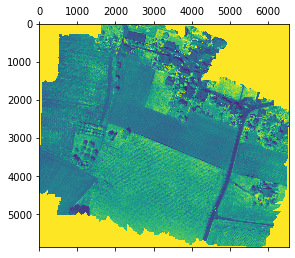

In [8]:
data1.plot()

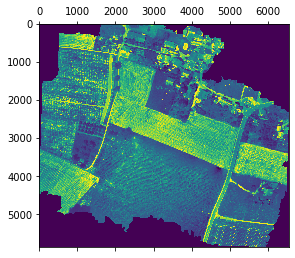

In [9]:
data2.plot()

In [10]:
(alignedraster_o, alignedraster_a, GeoT_a) = gr.align_rasters(raster1, raster2, how=np.mean)

In [14]:
alignedraster_o

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [15]:
alignedraster_a

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=999999,
  dtype=uint8)

In [16]:
imageio.imwrite('alignedraster_o.jpg', alignedraster_o)

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [17]:
imageio.imwrite('alignedraster_a.jpg', alignedraster_a)

In [18]:
NDV, xsize, ysize, GeoT, Projection, DataType = gr.get_geo_info(raster1)

In [19]:
with rasterio.open('odmNIR1band.tif') as src:
    a= src.read()
    for band in a:
        profile = src.profile

In [20]:
with rasterio.open('allignedNIR.tif', 'w', **profile) as dst:
    dst.write(alignedraster_o.astype(rasterio.uint8), 1)

In [21]:
with rasterio.open('allignedRE.tif', 'w', **profile) as dst:
    dst.write(alignedraster_a.astype(rasterio.uint8), 1)